## xcube Data Store Framework - CCI Open Data Portal

This notebook walks provides a walk-through demonstrating how to use xcube and the xcube Climate Change Initiative Open Data Portal (CCI) plugin to read and explore data from CCI Open Data Portal.


In [1]:
%matplotlib inline
# CCI Data Store requires asyncio. In order to work in Notebooks, we need to do the following:
from xcube.util.ipython import enable_asyncio
enable_asyncio()

In [2]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store
from IPython.display import JSON

import xarray as xr
# Various utilities
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

Configure matplotlib to display graphs inline directly in the notebook and set a sensible default figure size.

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,8


Which data accessors are available?

In [4]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

The data stores may offer different initialization options. Some of the options are mandatory. Let's have a look at the parameters for this store.

In [5]:
get_data_store_params_schema('cciodp')

Just provide mandatory parameters to instantiate the store class:

In [6]:
store = new_data_store('cciodp')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [7]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

Which "openers" are available? Note, the first part of an opener's name identifies the returned in-memory data type:

- `dataset` --> `xarray.Dataset` (Gridded data, multi-resolution pyramid)
- `mldataset` -->  `xcube.core.mlds.MultiLevelDataset`  (Gridded data, multi-resolution pyramid)
- `geodataframe` --> `geopandas.GeoDataFrame` (Vector data) 


The first opener is the default opener. In this case there is only a single one:

In [8]:
store.get_data_opener_ids()

('dataset:zarr:cciodp', 'dataset[cube]:zarr:cciodp')

We may ask for a specific dataset ...

In [9]:
store.has_data('esacci.OC.5-days.L3S.CHLOR_A.multi-sensor.multi-platform.MERGED.3-1.geographic')

True

... but in many cases we want to query for certain criteria. How can we do that?

In [10]:
store.get_search_params_schema()

Now search, let's search for sea surface temperature data (SST) with a daily frequency: 

In [11]:
iterator = store.search_data(ecv='SST', frequency='day')
JSON([item.to_dict() for item in iterator])

<IPython.core.display.JSON object>

Which parameters must be passsed or are available to open the dataset? 

In [12]:
store.get_open_data_params_schema('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1')

There are no required parameters, so we can decide what parameters we would like to provide them to open a dataset:

In [13]:
dataset = store.open_data(
    'esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1', 
    variable_names=['analysed_sst'],
    time_range=['2008-07-01','2008-07-10'])

dataset

<xarray.Dataset>
Dimensions:       (bnds: 2, lat: 3600, lon: 7200, time: 9)
Coordinates:
  * bnds          (bnds) int64 0 1
  * lat           (lat) float32 -89.975 -89.925 -89.875 ... 89.875 89.925 89.975
  * lon           (lon) float32 -179.975 -179.925 -179.875 ... 179.925 179.975
  * time          (time) datetime64[ns] 2008-07-01T12:00:00 ... 2008-07-09T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(9, 2), meta=np.ndarray>
Data variables:
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SST.day.L4.SSTdepth.multi-sensor.multi-pl...
    date_created:            2020-11-18T11:47:51.470173
    processing_level:        L4
    time_coverage_start:     2008-07-01T00:00:00
    time_coverage_end:       2008-07-10T00:00:00
    time_coverage_duration:  P9DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Plot one time stamp of the dataset for a analysed_sst in order to take a brief look at the dataset:  

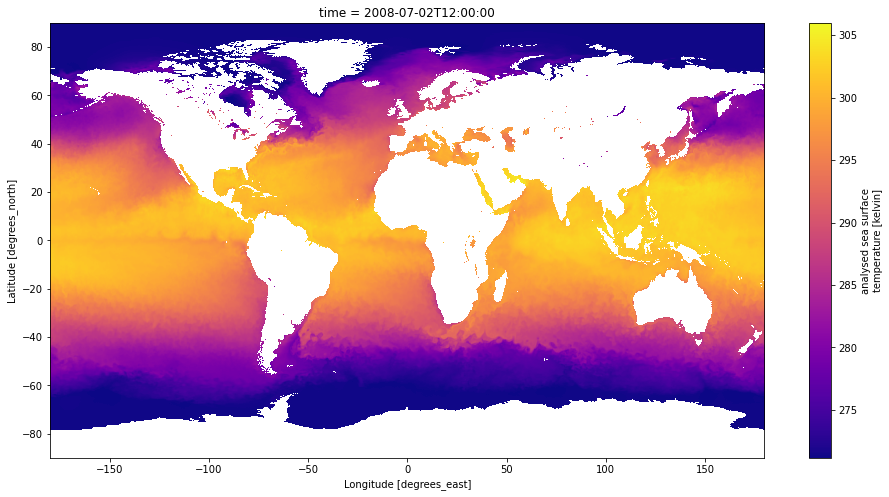

In [14]:
dataset.analysed_sst.isel(time=1).plot.imshow(cmap='plasma')